In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 19.2 MB 352 kB/s 
     |████████████████████████████████| 240 kB 57.3 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 106 kB 65.9 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 56.4 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 4.1 MB 40.9 MB/s 
     |████████████████████████████████| 1.9 MB 59.5 MB/s 
     |████████████████████████████████| 112 kB 67.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.1-py3-none-any.whl size=12224 sha256=10c9c84515cbfdc6b2ffb54e4c43280bf0c5a362750e932b4918b564758093c9
  Stored in directory: /root/.cache/pip/wheels/5a/65/57/e93e8

In [2]:
from qiskit import *

In [3]:
from qiskit.visualization import plot_histogram

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
qc = QuantumCircuit(4,3)
qc.x(3)
for i in range(3):
    qc.h(i)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ X ├
     └───┘
c_0: ═════
          
c_1: ═════
          
c_2: ═════

In [6]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qc.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
qc.draw()

┌───┐                                                               
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────
     ├───┤ │                                                             
q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────
     ├───┤ │        │        │                                           
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) 
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────
     └───┘                                                               
c_0: ════════════════════════════════════════════════════════════════════
                                                                         
c_1: ════════════════════════════════════════════════════════════════════
                                                                         
c_2: ════════════════════════════════════════════════════════════════════

In [8]:
def qft_inverse(qc, n): #inverse of Quantum Fourier Transform
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [9]:
qc.barrier()
#applying inverse of Quantum Fourier Transform
qft_inverse(qc, 3)
qc.barrier()
for n in range(3):
    qc.measure(n,n)

In [10]:
qc.draw()

┌───┐                                                                ░    »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░──X─»
     ├───┤ │                                                              ░  │ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░──┼─»
     ├───┤ │        │        │                                            ░  │ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░──X─»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  ░    »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────░────»
     └───┘                                                                ░    »
c_0: ══════════════════════════════════════════════════════════════════════════»
                                                                               »
c_1: ══════════════════════════════════════════════════════════════════════════»
                                                                               »
c_2: ══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌───┐                                         ░ ┌─┐      
«q_0: ┤ H ├─■──────────────■────────────────────────░─┤M├──────
«     └───┘ │P(-π/2) ┌───┐ │                        ░ └╥┘┌─┐   
«q_1: ──────■────────┤ H ├─┼─────────■──────────────░──╫─┤M├───
«                    └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
«q_2: ─────────────────────■─────────■────────┤ H ├─░──╫──╫─┤M├
«                                             └───┘ ░  ║  ║ └╥┘
«q_3: ──────────────────────────────────────────────░──╫──╫──╫─
«                                                   ░  ║  ║  ║ 
«c_0: ═════════════════════════════════════════════════╩══╬══╬═
«                                                         ║  ║ 
«c_1: ════════════════════════════════════════════════════╩══╬═
«                                                            ║ 
«c_2: ═══════════════════════════════════════════════════════╩═
«

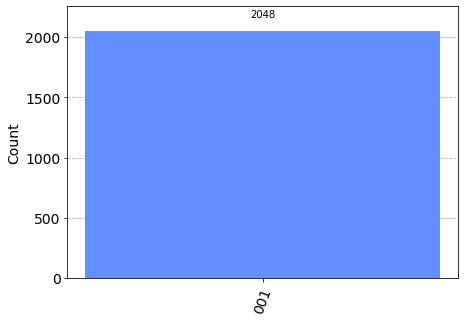

In [11]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
# we need to divide our result 001 (1) with 2^n to get theta = 1/8.